# Sommerprosjekt om nevrale nettverk ved CCSE   

Sommeren 2023 har jeg, Rachel K. Stiansen bachelorstudent ved Fysisk insitutt, jobbet med å undersøke vektene i nevrale nettverk. Gjennom hele prosjektet har jeg jobbet med MNIST-datasettet. Jeg har undersøkt hvordan vektene endrer seg ved gradvis læring av et nettverk, hvordan vektfordelingen i nettverket er og endrer seg over tid (og brukt supercomputers på insituttet til å gjenskape double descent fenomenet med CNN og MNIST-datasettet).

Merk at siden jeg ikke startet denne notebooken før halvveis inn i prosjektet er ikke alle endringene i koden underveis vist før 1. juli. Den endelige koden som kjører er selvfølgelig med. Siden jeg samlet alt i én notebook til sist må notebooken kjøres fra toppen av for å få riktig generert plott da jeg kunne ha vært flinkere til å definere funksjoner underveis. Noen av variabelnavnene er like og gjør derfor at plottene kan bli feil om koden ikke kjøres fra toppen.

Man kan også kjøre koden fra pakkeimplementasjonen som indikerer hvor en ny kodebit starter.

### 19. juni
Arbeidstimer: 8t

Jeg startet med å se noen introduksjonsvideoer om nevrale netverk: https://youtu.be/aircAruvnKk, https://youtu.be/IHZwWFHWa-w, https://youtu.be/Ilg3gGewQ5U, https://youtu.be/tIeHLnjs5U8 og leste litt i boken https://youtu.be/aircAruvnKk, https://youtu.be/IHZwWFHWa-w, https://youtu.be/Ilg3gGewQ5U, https://youtu.be/tIeHLnjs5U8 som ble foreslått i en av videoene.

Jeg leste også artikkelen https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/ og gikk gjennom dette kortet kurset https://course.elementsofai.com/no/5/3 om nevrale nettverk. 

### 20. juni
Arbeidstimer: 3t

Hadde ett møte med Anders om forventninger og fikk noen mål jeg kunne sette meg. Jeg skal prøve å se på vektendringen i de nevrale nettverkene og hvordan vektene endrer seg over tid. Kan også prøve å se på hvordan vektene endrer seg ved gradvis læring ved å først trene nettverket til å gjenkjenne tallene 0-3 i MNIST-datasettet og deretter implementere bilder av 4 i datasettet og se hva som skjer med vektendringen. En siste ting jeg kunne se på var double descent grafer, kan jeg gjenskape dem og hvorfor oppstår de? Fikk tips om å bruke PyTorch til å implementere nettverkene i Python.

Så deretter biter av litt ulike videoer om PyTorch og hvordan man bruker det til å modellere nevrale nettverk. Leste også litt over dokuemntasjonen.

Startet deretter på et script ved å følge noen av videoene. Fant ut at GPU-en min ikke støtter/har cuda som kan gjøre computation raskere. Linjen under som ofte oppstår i nettverkskoder er derfor ikke nødvendig

In [1]:
import torch

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 21. juni
Arbeidstimer: 8t

Tilpasset scriptet jeg hadde begynt på til MNIST-datasettet. Prøvde først å kombinere de to implementasjonene https://youtu.be/gBw0u_5u0qU og https://machinelearningmastery.com/handwritten-digit-recognition-with-lenet5-model-in-pytorch/ da jeg ønsket å bruke klassen Dataset fra youtubevideoen og i tillegg bruke torchvision til å laste ned datasettet som vist i link nr. 2.

Det viste seg å være et komplisert sted å begynne så jeg bestemte meg for å først prøve å få koden fra link nr. 2 til å kjøre og så sy de to kodene sammen senere. Koden vises under.

### Første implementasjon:
Fra https://machinelearningmastery.com/handwritten-digit-recognition-with-lenet5-model-in-pytorch/

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision # inneholder MNIST-dataset

Pytorch bruker tensors som er multidimensjonelle arrays. torch.nn inneholder mange verktøy og moduler nyttige for å sette opp nevrale nettverk.

In [3]:
# Load MNIST data
train = torchvision.datasets.MNIST('data', train=True, transform=transforms.ToTensor() , download=True)
test = torchvision.datasets.MNIST('data', train=True, transform=transforms.ToTensor() , download=True)
print(train.data.shape, train.targets.shape)
print(test.data.shape, test.targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([60000, 28, 28]) torch.Size([60000])


In [4]:
# each sample becomes a vector of values 0-1
X_train = train.data.reshape(-1, 784).float() / 255.0
y_train = train.targets
X_test = test.data.reshape(-1, 784).float() / 255.0
y_test = test.targets

In [5]:
class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 784)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.layer2(x)
        return x

### Definisjoner:

epoch = 1 forward pass og backpropagation for alle training samples

batch_size = antall training samples i en forward pass og backpropagation

iterasjoner = antall passes

eks. 100 samples, batch_size=20 gir 100/20 = 5 iterasjoner for 1 epoch

In [6]:
model = Baseline()

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=100)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    y_pred = model(X_test)
    acc = (torch.argmax(y_pred, 1) == y_test).float().mean()
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 83.79%
Epoch 1: model accuracy 87.50%
Epoch 2: model accuracy 88.84%
Epoch 3: model accuracy 89.58%
Epoch 4: model accuracy 90.23%
Epoch 5: model accuracy 90.71%
Epoch 6: model accuracy 91.00%
Epoch 7: model accuracy 91.41%
Epoch 8: model accuracy 91.69%
Epoch 9: model accuracy 91.99%


### Andre implementasjon
Fra https://youtu.be/gBw0u_5u0qU. Datasettet lastes ned fra www.di.ens.fr/~lelarge/MNIST.tar.gz 

In [7]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x, y = torch.load(r"MNIST\processed\training.pt")
plt.imshow(x[0].numpy())
plt.title(f"Number is {y[0].numpy()}")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'MNIST\\processed\\training.pt'

In [ ]:
class Data(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.0
        self.y = F.one_hot(self.y, num_classes=10).to(float) # = 10 siden tall fra 0-9

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [ ]:
train_set = Data(r"MNIST\processed\training.pt")
test_set = Data(r"MNIST\processed\test.pt")

In [ ]:
xs, ys = train_set[0:4]

batch_size=5

In [ ]:
train_load = DataLoader(train_set, batch_size=batch_size)
test_load = DataLoader(test_set, batch_size=batch_size)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100) # 1st layer hidden
        self.Matrix2 = nn.Linear(100,50) # 2nd layer hidden
        self.Matrix3 = nn.Linear(50,10) # 3rd layer output
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

f = NeuralNetwork()

f.Matrix3.weight.shape

torch.Size([10, 50])

In [ ]:
f(xs)

tensor([[ 0.1307,  0.0002,  0.0219,  0.0225, -0.0417, -0.0495,  0.0027, -0.1263,
          0.0230,  0.0845],
        [ 0.1473, -0.0658,  0.0188, -0.0033,  0.0070, -0.1241, -0.0089, -0.1010,
          0.0525,  0.1377],
        [ 0.1276, -0.0381,  0.0372,  0.0350, -0.0308, -0.0465,  0.0114, -0.1394,
          0.0347,  0.1267],
        [ 0.1322, -0.0350,  0.0191,  0.0216, -0.0183, -0.0867,  0.0158, -0.1118,
          0.0378,  0.0957]], grad_fn=<SqueezeBackward0>)

In [ ]:
y_sample = test_set[:][1]
y_sample

tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
L = nn.CrossEntropyLoss()

### Loss function

L er omtrent som the mean square error mellom to vektorer. Vi får minst verdi når de to vektorene er like. CrossEntropy er bare en annen måte å måle forskjellen mellom to vektorer. Større cross entropy bbetyr større forskjell mellom vektorene.

Cross entropy loss function: jo mer entropi jo mer ulike er de, jo høyere verdi har funksjonen.

In [ ]:
def train_model(dl, f, n_epochs=10):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    # input ----------
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            loss_value.backward() 
            opt.step() 
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [ ]:
epoch_data, loss_data = train_model(train_load, f)

Epoch 0


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [ ]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy')

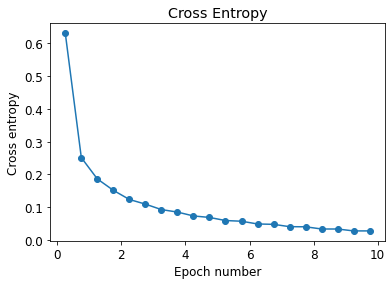

In [ ]:
plt.plot(epoch_data_avgd, loss_data_avgd, "o-")
plt.xlabel("Epoch number")
plt.ylabel("Cross entropy")
plt.title("Cross Entropy")

tensor(7)

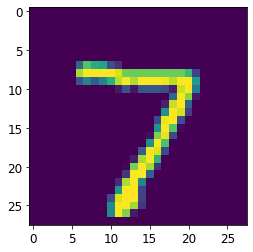

In [ ]:
y_sample = test_set[0][1] # er lik 7, skal se om vi kan forutse det
x_sample = test_set[0][0]
plt.imshow(x_sample)

y_hat = f(x_sample)
torch.argmax(y_hat) # den gjetter riktig!

In [ ]:
# Tester for flere verdier:
xs, ys = test_set[0:2000]
yhats = f(xs).argmax(axis=1) # det som printes er de forventede verdiene
yhats

tensor([7, 2, 1,  ..., 3, 9, 5])

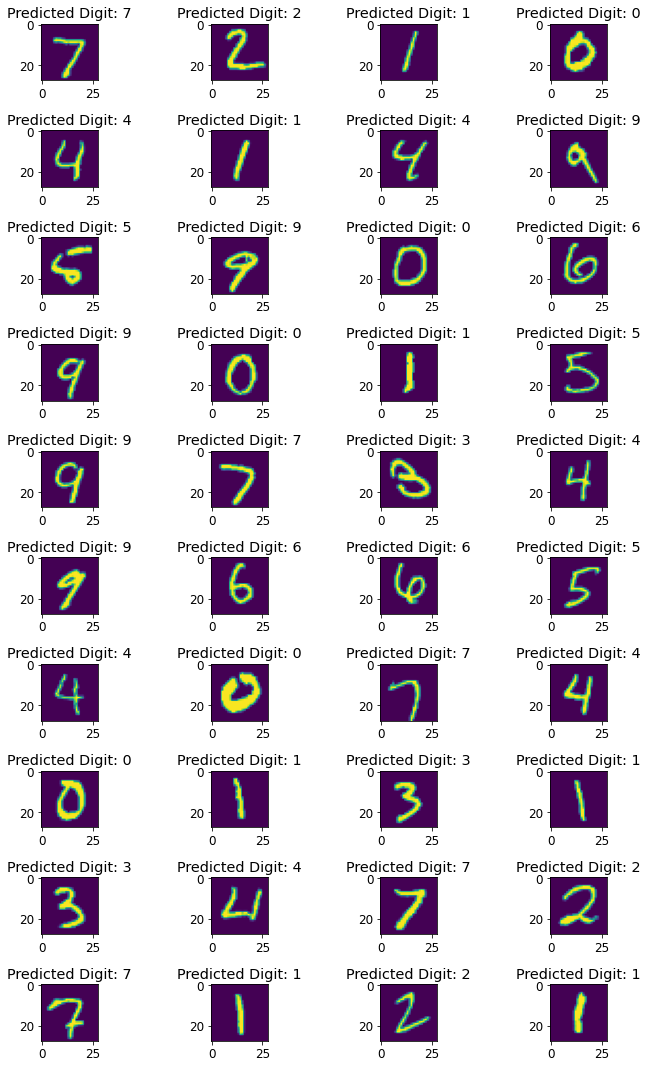

In [ ]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()

Oppsummerte litt for meg selv hva som skjer i et nevralt nettverk under:

### Hva er nevrale nettverk?
Et nevralt nettverk består av input-verdier, skjulte lag og output-verdier. Nevronene i ett lag får input-verdier fra nevronene i det forrige laget. Når man lærer opp et nevralt nettverk til å gi oss outputs vi forventer må vi finne de vektene og biasene som passer best. Vi bruker en aktiveringsfunksjon for å beskrive output-oppførselen til nevronene. Denne funksjonen transformerer den vektede summen til hvert nevron til å være eks. mellom 0 og 1. Eks. ReLu, Sigmoid eller trinnverdifunksjonen.

Vi gir vektene optimal verdi med backpropagation. Vi sier hva slags output vi ønsker fro et gitt input og ser hvordan vi må endre vektene deretter. Det er vektene med størst verdi som det lønner seg å endre på da denne den gir størst påvrikning på resultatet. 

Konvolusjonelle nevrale nettverk reduserer mengden treningsdata ved å gjenkjenne særegne trekk i bildene uavhengig av hvor i bildet det er plassert.

### Visulaisering av ReLU-funksjonen:

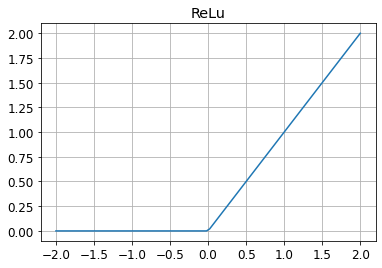

In [ ]:
x = torch.linspace(-2, 2, 100)
R = nn.ReLU()

plt.plot(x.numpy(), R(x).numpy())
plt.title("ReLu")
plt.grid()
plt.show()

Kikket også litt på hvordan jeg kunne hente ut vektene fra nettverket, men har ikke fått noen resultater enda.